# LENDING CLUB CASE STUDY

In [353]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('loan.csv')

df.head()

C:\Users\MAALOLAN\AppData\Local\Temp\ipykernel_10720\4256711004.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [24]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### Finding null columns

In [25]:
# No of columns where NULL > 25000 can be dropped
print(df.columns[df.isnull().sum()>25000])
print(len(df.columns[df.isnull().sum()>25000]))

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [26]:
df.drop(columns= df.columns[df.isnull().sum()>25000], inplace=True)

df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [32]:
# Seems like desc column has around 26775 
df.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [29]:
df.iloc[27,19]

'  Borrower added on 12/16/11 > I have a stable job where I will never get laid off.<br><br> Borrower added on 12/16/11 > I need the loan to pay for some recent medical expenses and I need to get my car fixed.<br>'

##### Desc column is the loan description provided by borrowers. There are too many empty values here. Instead of using the text of the column we can use this categorical column to make a boolean column having true if any reason is present and false if not. This way this column need not be wasted and can be used for further analysis

In [31]:
df['is_reason_present'] = df.desc.isnull()

df['is_reason_present']

0        False
1        False
2         True
3        False
4        False
         ...  
39712    False
39713    False
39714     True
39715     True
39716    False
Name: is_reason_present, Length: 39717, dtype: bool

##### Int_Rate seems to be a float, it is labelled as object since there is % symbol at the end of the float value. So writing a function to remove the % value and convert to float

In [184]:
def remove_and_conv_to_float(x):
    if (type(x) == str and x[-1] == '%'):
        return float(x[:-1])
    else:
        return x

In [185]:
remove_and_conv_to_float('0.54%')

0.54

In [40]:
df.int_rate = df.int_rate.apply(remove_and_conv_to_float)

df.int_rate.head(10)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64

##### Exploring the emp_length column

In [42]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [48]:
print(df.url.iloc[3])
print(df.iloc[3,0])

https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
1076863


In [55]:
df.loc[df['collections_12_mths_ex_med'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,is_reason_present
39629,131387,113921,6000,6000,600.0,36 months,10.59,195.27,C,C2,...,Sep-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0,False
39642,127213,85483,2000,2000,1575.0,36 months,7.12,61.87,A,A1,...,Apr-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,False
39650,84918,84914,5000,5000,2025.0,36 months,7.43,155.38,A,A2,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,False
39659,121568,121574,4000,4000,1925.0,36 months,9.64,128.41,B,B4,...,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,False
39660,121535,121373,2800,2800,1625.0,36 months,8.70,88.65,B,B1,...,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,False
39666,119043,119040,15450,15450,600.0,36 months,11.22,507.46,C,C4,...,Mar-10,NaN,1,INDIVIDUAL,0,NaN,0,1.0,0.0,False
39667,118823,118026,2500,2500,675.0,36 months,12.80,84.00,D,D4,...,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0,False
39668,118533,117783,2500,2500,825.0,36 months,9.64,80.26,B,B4,...,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0,False
39669,118523,118519,6500,6500,225.0,36 months,15.01,225.37,F,F1,...,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0,False
39670,117863,117849,8000,8000,2275.0,36 months,9.96,257.99,B,B5,...,Feb-14,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0,False


In [56]:
df['emp_title'].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [67]:
df.loc[df.emp_title.isnull()]['loan_status'].value_counts()/df['loan_status'].value_counts()*100

loan_status
Fully Paid     5.772382
Charged Off    8.601386
Current        6.403509
Name: count, dtype: float64

##### Since the % of loan_status is lesser than 10 for all the rows where empt_title is null, we shall go ahead and remove those rows

In [162]:
newdf = df.loc[~df.emp_title.isnull()]
newdf.emp_title.isnull().sum()

0

In [163]:
newdf.isnull().sum(axis = 0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                       56
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12087
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [164]:
newdf.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    35090
1.0     1507
2.0        7
Name: count, dtype: int64

In [165]:
newdf.loc[newdf.pub_rec_bankruptcies.isnull()][['pub_rec']].value_counts()

pub_rec
0          634
1           19
2            1
Name: count, dtype: int64

##### We shall assume that pub_rec_bankruptcies is 0 for pub_rec having value 0. We shall drop the other rows where pub_rec_bankruptcies is null

In [166]:
newdf = newdf[~((newdf.pub_rec_bankruptcies.isnull()) & (newdf.pub_rec != 0))]

newdf.loc[newdf.pub_rec_bankruptcies.isnull()][['pub_rec']].value_counts()

pub_rec
0          634
Name: count, dtype: int64

In [167]:
newdf.pub_rec_bankruptcies.fillna(0, inplace=True)

newdf.pub_rec_bankruptcies.isnull().sum()

0

In [168]:
newdf.isnull().sum(axis = 0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                       56
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12086
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [169]:
newdf.last_pymnt_d.value_counts()

last_pymnt_d
May-16    1176
Mar-13     970
Dec-14     878
May-13     858
Feb-13     819
          ... 
Nov-08      10
Apr-08      10
Mar-08       5
Jan-08       2
Feb-08       1
Name: count, Length: 101, dtype: int64

##### Removing all rows having null for the rest of the columns

In [170]:
newdf = newdf[~newdf.last_pymnt_d.isnull()]
newdf = newdf[~newdf.tax_liens.isnull()]

newdf.columns[newdf.isnull().sum(axis = 0)>0]

Index(['emp_length', 'desc', 'title', 'revol_util',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths'],
      dtype='object')

In [171]:
newdf.drop(columns='desc', inplace=True)

In [172]:
newdf.emp_length.value_counts()

emp_length
10+ years    8520
2 years      4259
< 1 year     4185
3 years      3971
4 years      3343
5 years      3166
1 year       3114
6 years      2156
7 years      1719
8 years      1430
9 years      1224
Name: count, dtype: int64

##### We can impute with the mode value of 10+ years

In [173]:
newdf.emp_length.fillna('10+ years', inplace=True)

In [174]:
newdf.isnull().sum(axis = 0).sort_values(ascending = False)

revol_util                    42
chargeoff_within_12_mths      15
collections_12_mths_ex_med    15
title                          9
id                             0
total_rec_late_fee             0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
collection_recovery_fee        0
recoveries                     0
pub_rec                        0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credit_pull_d             0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
tax_liens                      0
revol_bal                      0
open_acc                       0
member_id                      0
inq_last_6mths                 0
loan_amnt 

In [175]:
newdf.revol_util.value_counts()

revol_util
0%        881
0.20%      60
63%        58
61%        55
64.80%     55
         ... 
23.11%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1082, dtype: int64

In [186]:
newdf.revol_util = newdf.revol_util.apply(remove_and_conv_to_float)

newdf.revol_util.value_counts()

revol_util
0.00     881
0.20      60
63.00     58
61.00     55
64.80     55
        ... 
23.11      1
0.83       1
47.36      1
24.65      1
7.28       1
Name: count, Length: 1082, dtype: int64

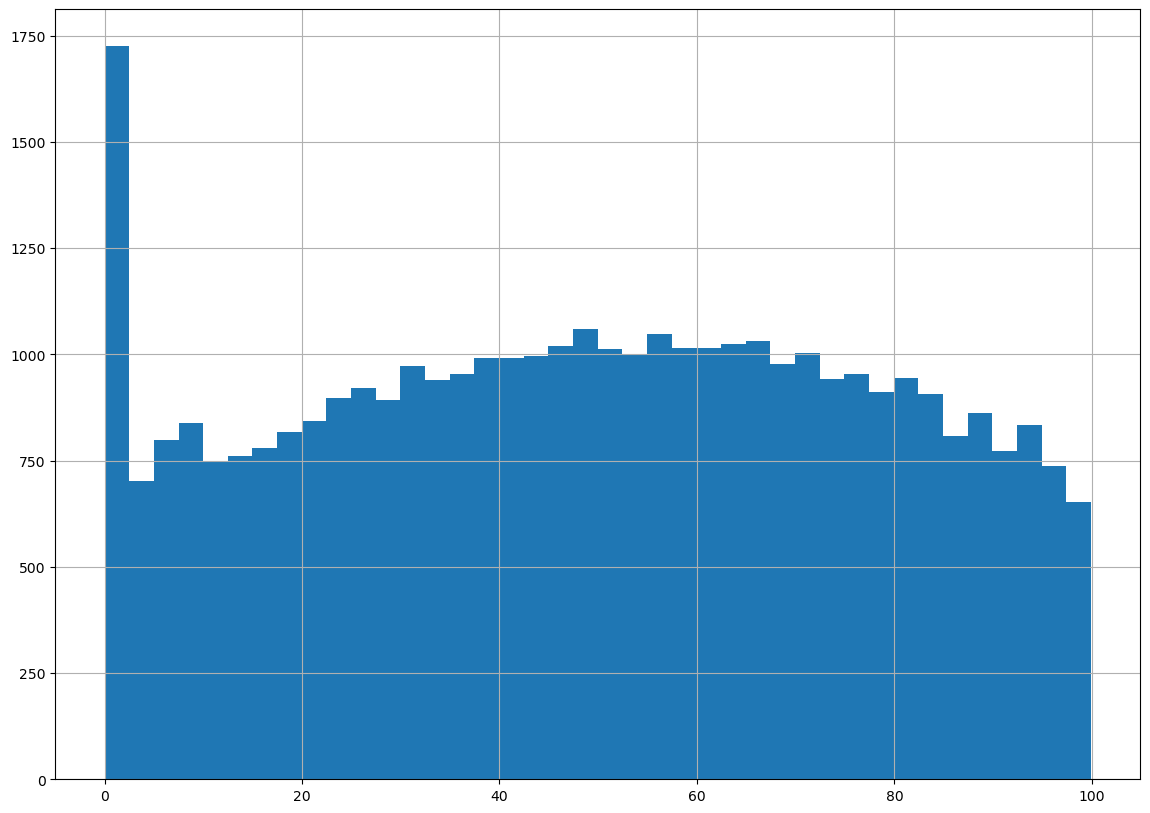

In [191]:
plt.figure(figsize=[14,10])
newdf.revol_util.hist(bins = 40)
plt.show()

##### Since there is a high amount of utility near 0, we can safely impute the rest of the null values with 0 the mode

In [196]:
newdf.revol_util.fillna(0.0, inplace=True)

In [200]:
newdf[newdf.isnull().any(axis = 1)].shape

(24, 54)

##### Removing the rest of the rows which has any Null values

In [201]:
finaldf = newdf[~newdf.isnull().any(axis = 1)]

finaldf.isnull().sum(axis = 0)

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

#### We have arrived with finaldf as the final dataframe having no Null Values

In [204]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37119 entries, 1 to 39665
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37119 non-null  int64  
 1   member_id                   37119 non-null  int64  
 2   loan_amnt                   37119 non-null  int64  
 3   funded_amnt                 37119 non-null  int64  
 4   funded_amnt_inv             37119 non-null  float64
 5   term                        37119 non-null  object 
 6   int_rate                    37119 non-null  float64
 7   installment                 37119 non-null  float64
 8   grade                       37119 non-null  object 
 9   sub_grade                   37119 non-null  object 
 10  emp_title                   37119 non-null  object 
 11  emp_length                  37119 non-null  object 
 12  home_ownership              37119 non-null  object 
 13  annual_inc                  37119 no

In [283]:
finaldf.reset_index(inplace=True)

## EXPLORATORY DATA ANALYSIS

##### Check the range of funded_amnt, loan_amnt and funded_amnt_inv column

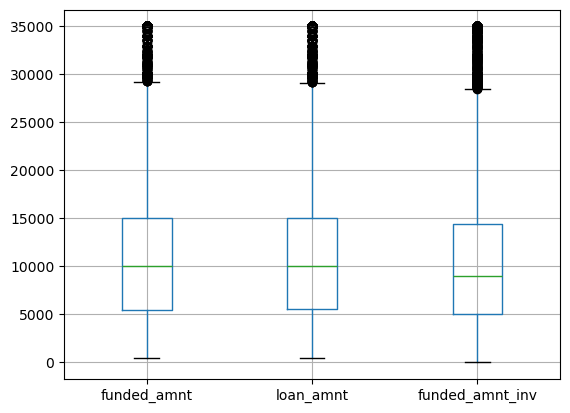

In [418]:
finaldf.boxplot(['funded_amnt','loan_amnt','funded_amnt_inv'])
plt.show()

##### It is observed that all these 3 columns have a very similar distribution so for later observations we can use either of these columns and not all 3 since they will add unnecessary bias towards analysis
###### Also it is observed that amounts > 30000 seems to be outliers

<Axes: >

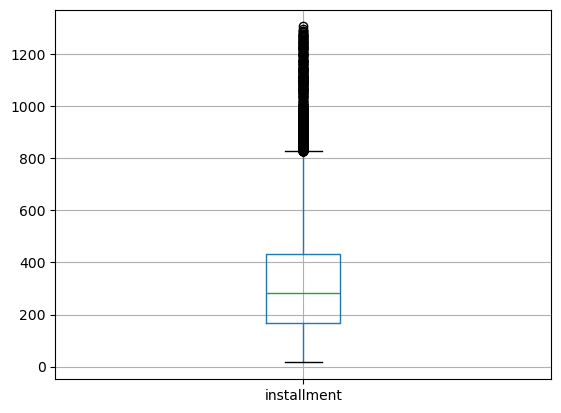

In [218]:
finaldf.boxplot('installment')

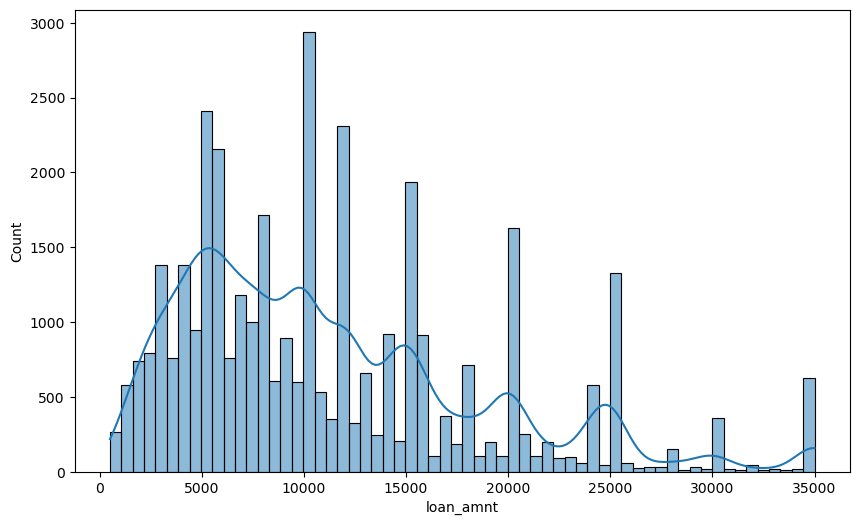

In [434]:
plt.figure(figsize=[10,6])
sns.histplot(finaldf['loan_amnt'], kde = True)
plt.show()

##### From the loan amount distribution it is observed that there are spikes near multiples of 5000s. This is because of rounding off from borrowers where if there is a necessity of loan amounts of for example 4676, they take a round amount of 5000.

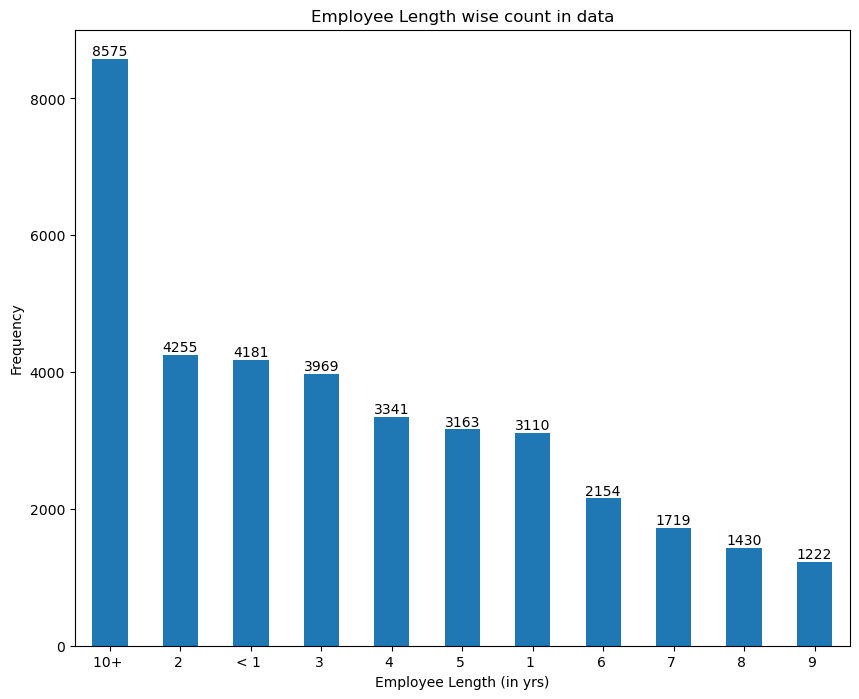

In [420]:
plt.figure(figsize=[10,8])
emp_len = finaldf.emp_length.value_counts()
ax = emp_len.plot(kind="bar")
ax.set_title("Employee Length wise count in data")
ax.set_xlabel("Employee Length (in yrs)")
ax.set_ylabel("Frequency")
ax.set_xticklabels([x.split('year')[0] for x in emp_len.index], rotation = 0)

# Adding annotations to the bars
rects = ax.patches
for rect, label in zip(rects, emp_len):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom")

plt.savefig('emp_len.png')
plt.show()

##### We have maximum data of employees who were employed for more than 10 years

### UNIVARIATE ANALYSIS

#### Categorical Variables Analysis

In [266]:
obj_dtypes = [i for i in finaldf.select_dtypes(exclude= np.number).columns]
num_dtypes = [i for i in finaldf.select_dtypes(include = np.number).columns]

print ("CATEGORICAL COLS")
for obj in obj_dtypes:
    print(obj)
print ("\n\nNUMERICAL COLS")
for nums in num_dtypes:
    print(nums)

CATEGORICAL COLS
term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
url
purpose
title
zip_code
addr_state
earliest_cr_line
initial_list_status
last_pymnt_d
last_credit_pull_d
application_type
is_reason_present


NUMERICAL COLS
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


<Axes: >

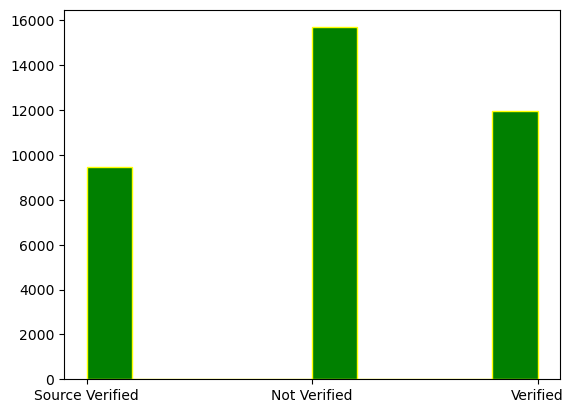

In [267]:
# Unordered categorical variable
finaldf.verification_status.hist(grid=False, color='green', edgecolor='yellow')

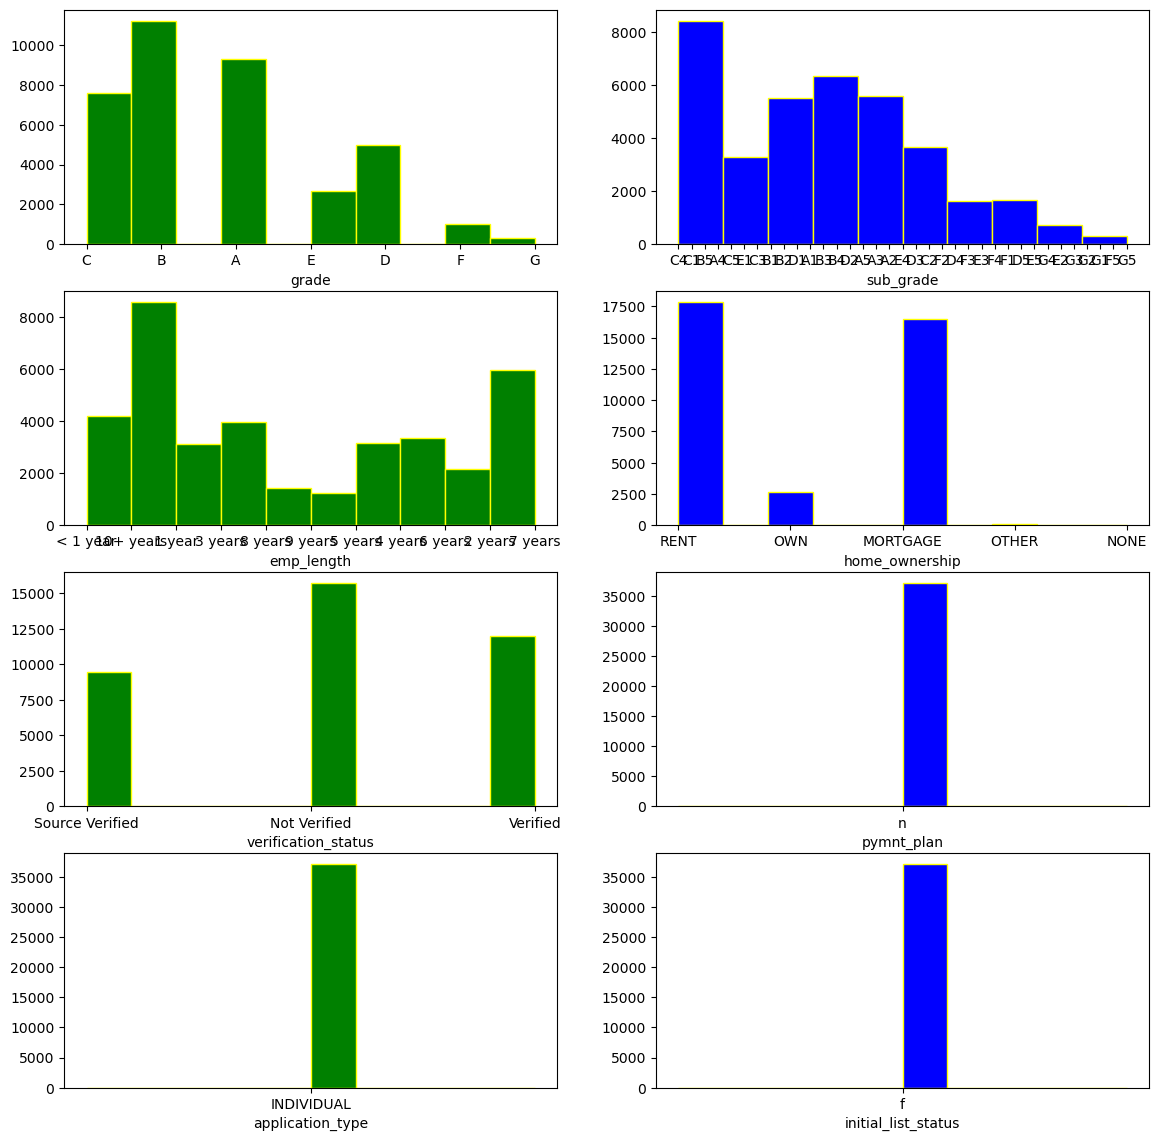

In [464]:
cat_plot_cols = [['grade','sub_grade'],['emp_length','home_ownership'],['verification_status','pymnt_plan'],['application_type','initial_list_status']]
colors = ['green','blue']
fig, ax = plt.subplots(ncols = 2, nrows = 4)
fig.set_size_inches(14,14)
for row in range(4):
    for col in range(2):
        ax[row][col].hist(finaldf[cat_plot_cols[row][col]], color = colors[col], edgecolor='yellow')
        ax[row][col].set_xlabel(cat_plot_cols[row][col])
plt.savefig('cat_plots.png')
plt.show()

##### From the plots seems like 'grade','sub_grade','emp_length','home_ownership','verification_status' seem to be useful and columns like 'pymnt_plan','application_type','initial_list_status' are not much useful since they have only 1 value

#### Check for different columns and how they affect the loan_status column

In [245]:
finaldf.groupby('loan_status').agg({'loan_amnt':['count','mean']})

loan_amnt              
                count          mean
loan_status                        
Charged Off      5066  12277.235492
Current          1067  17112.019681
Fully Paid      30986  10919.080391

##### Since we had observed that loan amounts > 30000 were outliers let us check the spread of the loan_status on that specific subset

In [246]:
finaldf[finaldf.loan_amnt>=30000].groupby('loan_status').agg({'loan_amnt':['count','mean']})

loan_amnt              
                count          mean
loan_status                        
Charged Off       224  33235.825893
Current           122  33256.352459
Fully Paid        763  33014.941022

### Which month and year combination as the last date had the most number of defaulters?

In [318]:
defaulters = finaldf[finaldf.loan_status=='Charged Off']

defaulters.shape

(5066, 55)

In [319]:
defaulters.reset_index(inplace=True)

In [320]:
defaulters.last_pymnt_d.head()

0    Apr-13
1    Nov-12
2    Jul-12
3    Oct-13
4    Sep-13
Name: last_pymnt_d, dtype: object

In [321]:
import datetime

defaulters.loc[:,'last_pymnt_date'] = pd.to_datetime(defaulters['last_pymnt_d'], format = '%b-%y')

defaulters.last_pymnt_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5066 entries, 0 to 5065
Series name: last_pymnt_date
Non-Null Count  Dtype         
--------------  -----         
5066 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.7 KB


C:\Users\MAALOLAN\AppData\Local\Temp\ipykernel_10720\1616784519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'last_pymnt_date'] = pd.to_datetime(defaulters['last_pymnt_d'], format = '%b-%y')


In [323]:
defaulters['last_pymt_month'] = defaulters.last_pymnt_date.apply(lambda x : x.month)
defaulters['last_pymt_year'] = defaulters.last_pymnt_date.apply(lambda x : x.year)

defaulters.head()

C:\Users\MAALOLAN\AppData\Local\Temp\ipykernel_10720\743320631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters['last_pymt_month'] = defaulters.last_pymnt_date.apply(lambda x : x.month)
C:\Users\MAALOLAN\AppData\Local\Temp\ipykernel_10720\743320631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters['last_pymt_year'] = defaulters.last_pymnt_date.apply(lambda x : x.year)


,level_0,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,is_reason_present,last_pymnt_date,last_pymt_month,last_pymt_year
0,0,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,INDIVIDUAL,0,0.0,0,0.0,0.0,False,2013-04-01,4,2013
1,6,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,...,INDIVIDUAL,0,0.0,0,0.0,0.0,False,2012-11-01,11,2012
2,9,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,...,INDIVIDUAL,0,0.0,0,0.0,0.0,False,2012-07-01,7,2012
3,11,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,...,INDIVIDUAL,0,0.0,0,0.0,0.0,True,2013-10-01,10,2013
4,18,21,1039153,1269083,21000,21000,21000.0,36 months,12.42,701.73,...,INDIVIDUAL,0,0.0,0,0.0,0.0,False,2013-09-01,9,2013


In [329]:
defaulters.groupby(['last_pymt_year','last_pymt_month']).count()[['id']].sort_values(by = 'id',ascending = False)

id
last_pymt_year last_pymt_month     
2012           10               161
               7                156
               6                142
               8                140
               2                134
...                             ...
2008           7                  3
2016           4                  2
2008           11                 1
2016           3                  1
2008           3                  1

[97 rows x 1 columns]

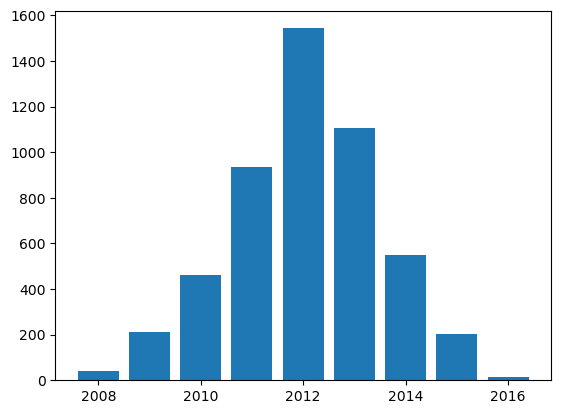

In [335]:
default_per_year = defaulters.last_pymt_year.value_counts()
plt.bar(default_per_year.index, default_per_year)
plt.show()

##### The most number of defaulters had the last payment in the month of October 2012. Most defaults have happened in 2012. Some event has ocurred in 2012 which might have lead to many people not being able to continue their due installments

In [338]:
finaldf.delinq_amnt.value_counts()

delinq_amnt
0    37119
Name: count, dtype: int64

In [339]:
finaldf.delinq_2yrs.value_counts()

delinq_2yrs
0     33080
1      3092
2       644
3       206
4        58
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [344]:
delinq = finaldf.pivot_table(index = 'delinq_2yrs', columns = 'loan_status', values = 'id', aggfunc = 'count')
delinq.fillna(0, inplace = True)

delinq

loan_status,Charged Off,Current,Fully Paid
delinq_2yrs,,,
0,4455.0,954.0,27671.0
1,449.0,89.0,2554.0
2,115.0,14.0,515.0
3,29.0,8.0,169.0
4,12.0,2.0,44.0
5,3.0,0.0,18.0
6,1.0,0.0,9.0
7,1.0,0.0,3.0
8,1.0,0.0,1.0


<Axes: xlabel='delinq_2yrs'>

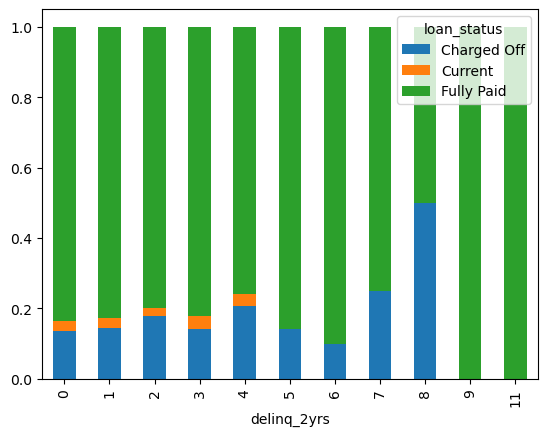

In [346]:
norm = delinq.apply(lambda x: x/x.sum(), axis = 1)
norm.plot.bar(stacked = True)

##### Since the number of data points we have for fully paid customers are very high, this graph might be a bit skewed, but the chances of customers not paying off the loan is clearly higher for those customers who have atleast 7 times 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

### BIVARIATE ANALYSIS

In [351]:
num_dtypes

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

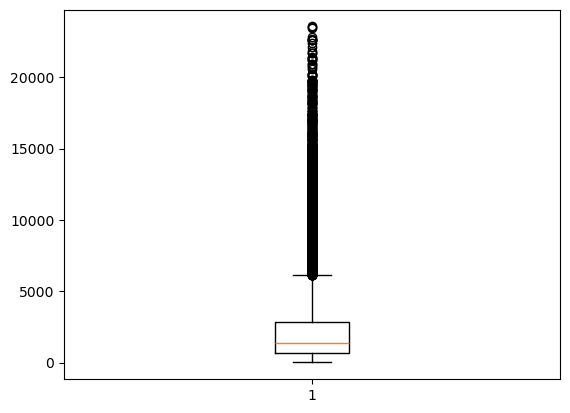

In [452]:
plt.boxplot(finaldf.total_rec_int)
plt.show()

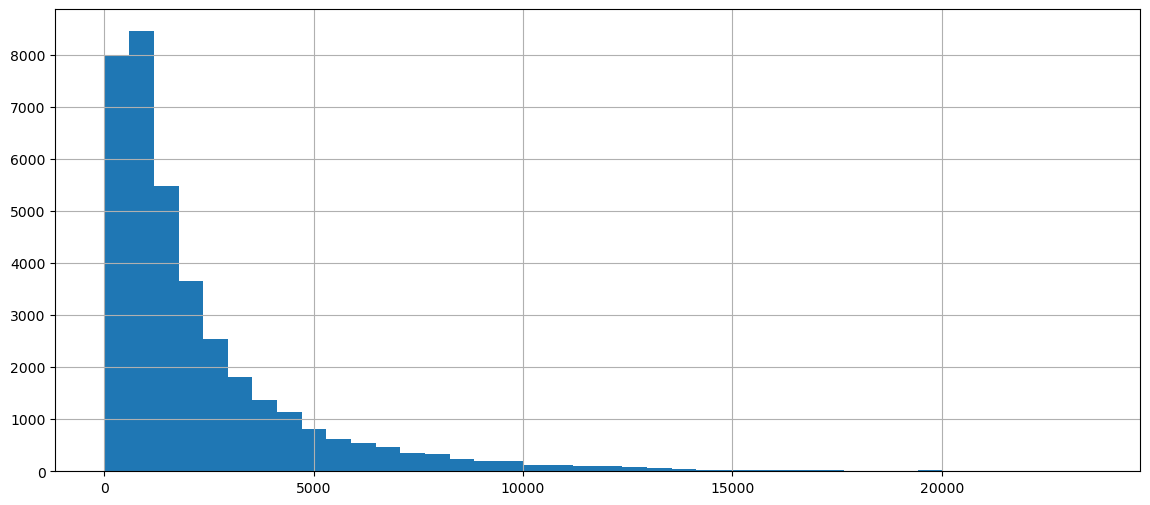

In [453]:
plt.figure(figsize = [14,6])
finaldf.total_rec_int.hist(bins = 40)
plt.show()

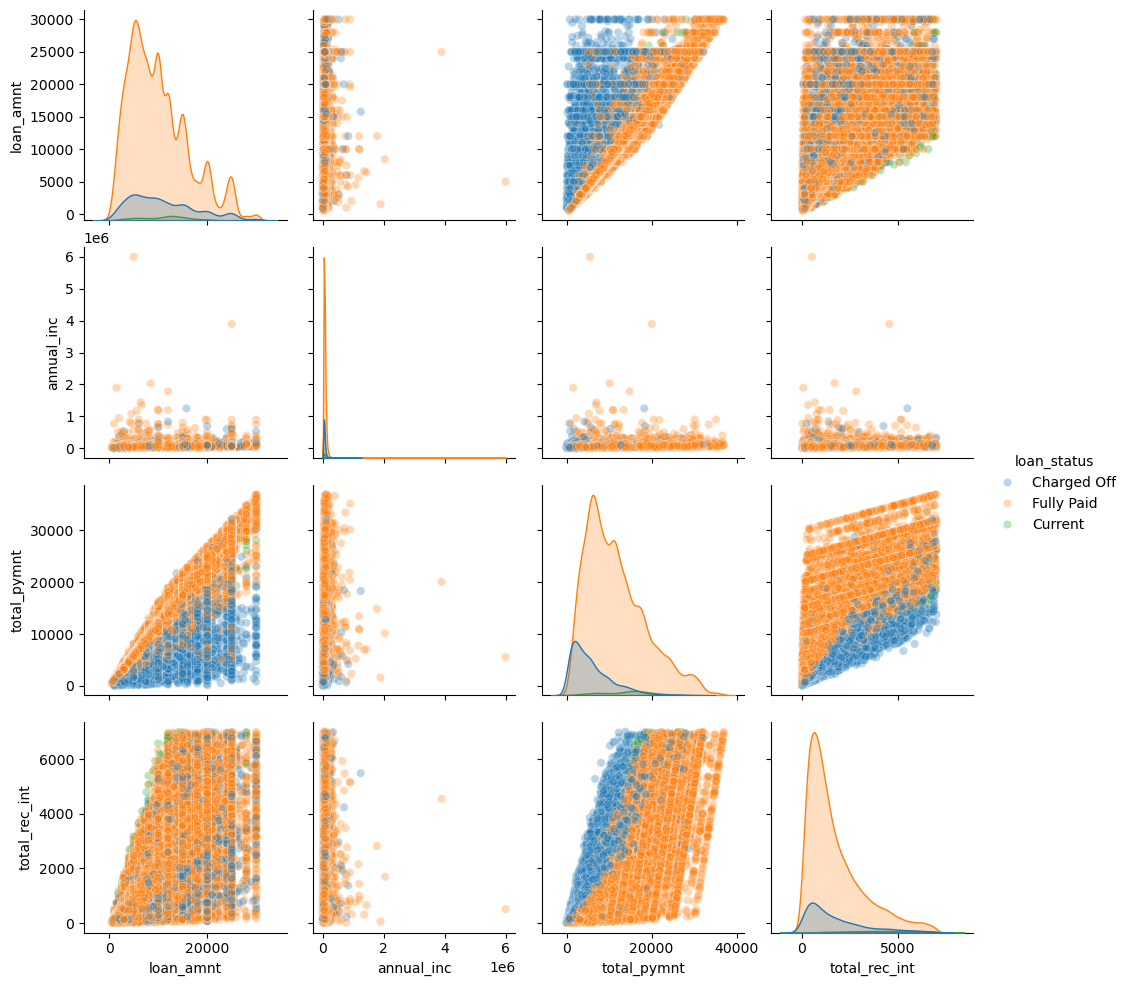

In [459]:
amounts = finaldf[(finaldf.total_rec_int <= 7000) & (finaldf.loan_amnt <= 30000)][['loan_amnt','annual_inc','total_pymnt','total_rec_int','loan_status']]
sns.pairplot(amounts, hue = 'loan_status',  plot_kws={'alpha':0.3})
plt.savefig('paiplot.png')
plt.show()

##### Total_pymnt seems to have a good correlation with the total_rec_int column. The total_rec_int is the total interest received and total payment is the total payment received, hence there is a correlation. We can observe that the charged off loans lie in the lower total payment range. Not much correlation visible in thr other columns

#### What is the average loan amount that generally gets charged off?

In [359]:
finaldf.groupby('loan_status')[['loan_amnt']].mean()

,loan_amnt
loan_status,
Charged Off,12277.235492
Current,17112.019681
Fully Paid,10919.080391


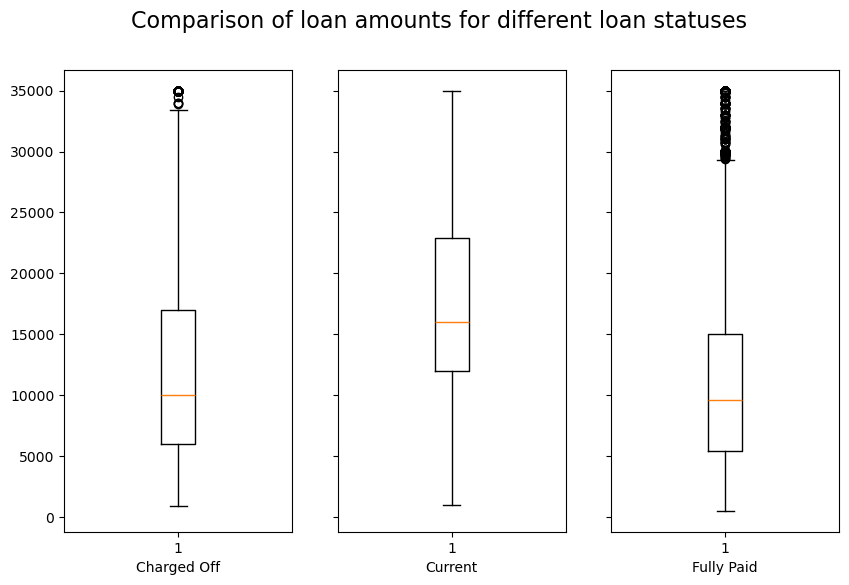

In [383]:
fig, ax = plt.subplots(nrows =1, ncols = 3, squeeze = False, sharey = True)
fig.set_size_inches(10,6)
ax[0][0].boxplot(finaldf[finaldf.loan_status == 'Charged Off'][['loan_amnt']])
ax[0][0].set_xlabel('Charged Off')
ax[0][1].boxplot(finaldf[finaldf.loan_status == 'Current'][['loan_amnt']])
ax[0][1].set_xlabel('Current')
ax[0][2].boxplot(finaldf[finaldf.loan_status == 'Fully Paid'][['loan_amnt']])
ax[0][2].set_xlabel('Fully Paid')
fig.suptitle('Comparison of loan amounts for different loan statuses', fontsize=16)
plt.show()

##### On an average higher amount of loans get charged off. On an average higher amount of loans get charged off. The spread of charged off loans goes towards the higher loan amounts. The 75th percentile is above 15000 for charged off loans whereas it is lesser than 15000 for fully paid loans. <br> The average loan amount which gets charged off is 12277.23

### Which type of home owners generally default on a loan?

In [394]:
default = defaulters.groupby('home_ownership')[['id']].count()
tot_count = finaldf.groupby('home_ownership')[['id']].count()
perc_defaults = default/tot_count * 100
totals = pd.concat([default, tot_count, perc_defaults], axis=1)
totals.columns = ['defaulters','Total Borrowers', '% Defaulters']
totals.sort_values(by = '% Defaulters', inplace=True, ascending=False)
totals

,defaulters,Total Borrowers,% Defaulters
home_ownership,,,
OTHER,18.0,96,18.750000
RENT,2588.0,17854,14.495351
OWN,362.0,2640,13.712121
MORTGAGE,2098.0,16528,12.693611
NONE,NaN,1,NaN


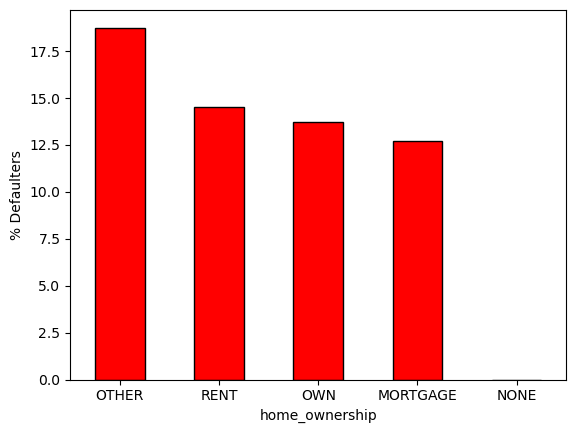

In [431]:
totals['% Defaulters'].plot.bar(color = 'red', edgecolor = 'black')
plt.ylabel('% Defaulters')
plt.xticks(rotation = 0)
plt.show()

##### The total % of borrowers who default is higher for borrowers who take home_ownership type is 'OTHER'. But following that the next highest % of defaulters are from borrowers who take house on Rent. Thus these 2 categories are hot spots to look at when giving a loan.

In [401]:
total_acc_spread = defaulters.total_acc.value_counts()/finaldf.total_acc.value_counts()*100
total_acc_spread.sort_values(ascending=False, inplace = True)
total_df = pd.concat([total_acc_spread, finaldf.total_acc.value_counts()], axis = 1)
total_df.columns = ['% default','Total']
total_df.head()

,% default,Total
total_acc,,
70,100.000000,1
60,33.333333,24
2,33.333333,3
66,25.000000,4
3,23.456790,162


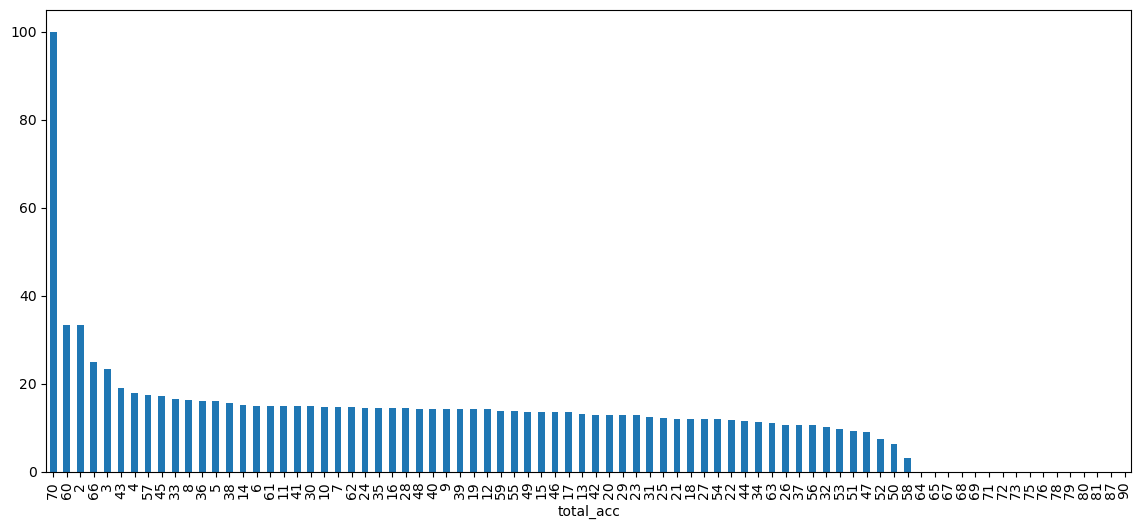

In [405]:
plt.figure(figsize=[14,6])
total_acc_spread.plot.bar()
plt.show()

##### The only person who has 70 credit lines has defaulted. But we cannot take that as a definitive fact due to less number of data. But overall people who have either 60 credit lines or 3 credit lines seem to have defaulted with a good percentage. So these are few indicators to check whether loan should be given

In [416]:
pivoted = finaldf.pivot_table(index = 'grade', columns = 'loan_status', values = 'total_rec_int', aggfunc = 'median')
pivoted

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,543.150,2651.260,718.390
B,1039.705,4894.125,1418.640
C,1243.810,6021.415,1721.395
D,1713.090,7226.860,2412.215
E,2885.820,9145.200,4028.975
F,4356.220,12935.340,5798.480
G,3814.080,12984.680,8049.420


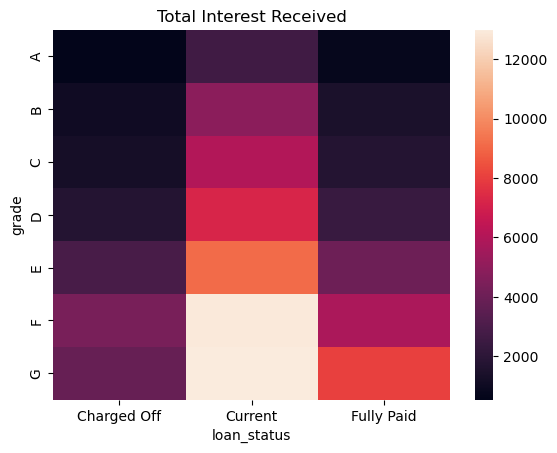

In [417]:
sns.heatmap(pivoted)
plt.title('Total Interest Received')
plt.show()

##### It is observed that there is a difference in the higher grades F and G. When the amount of interest received is high (6000 and above) those loans tend to get fully paid. If the interest received is around 4000 or lesser, those loans tend to get defaulted. Hence this is an indicator on when the loan might get defaulted.

In [475]:
emp_def = defaulters.groupby('emp_length').count()[['id']]
emp_total = finaldf.groupby('emp_length').count()[['id']]
perc_emp_def = emp_def / emp_total * 100
defs_emp_len = pd.concat([emp_def, emp_total, perc_emp_def], axis = 1)
defs_emp_len.columns = ['Defaulters', 'Total', 'Defaulters %']
defs_emp_len.sort_values(by = 'Defaulters %', ascending=False, inplace = True)
defs_emp_len

,Defaulters,Total,Defaulters %
emp_length,,,
10+ years,1272,8575,14.833819
7 years,253,1719,14.717859
6 years,294,2154,13.649025
8 years,195,1430,13.636364
1 year,422,3110,13.569132
5 years,427,3163,13.499842
3 years,527,3969,13.277904
< 1 year,552,4181,13.202583
4 years,437,3341,13.079916


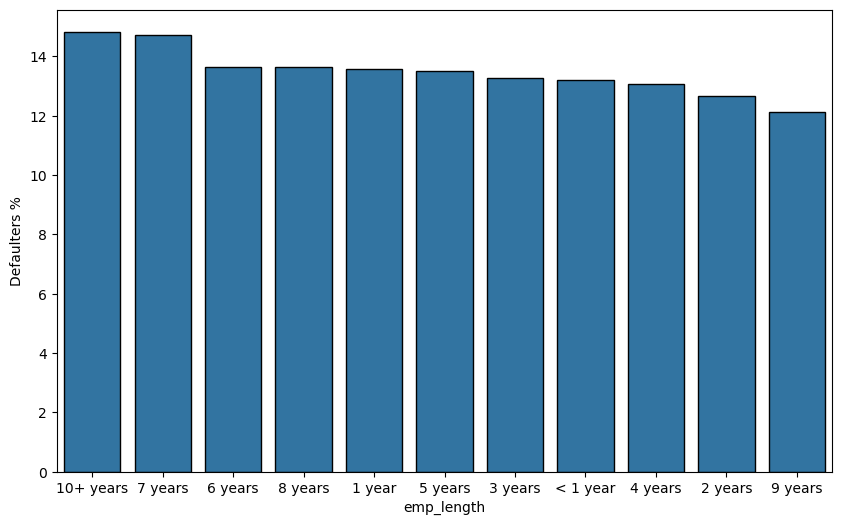

In [476]:
plt.figure(figsize = [10,6])
sns.barplot(defs_emp_len['Defaulters %'], edgecolor = 'black')
plt.show()

##### There seems to be higer percentage of defaulters in employees who have worked for more than 10 years. It is quickly followed by an employment length of 7 years. It maybe the case that after 7 years of working people tend to apply loans for various categories like house loan, car loan or even loan for their businesses but after that are unable to pay back the same. But overall there is no stark difference for any category

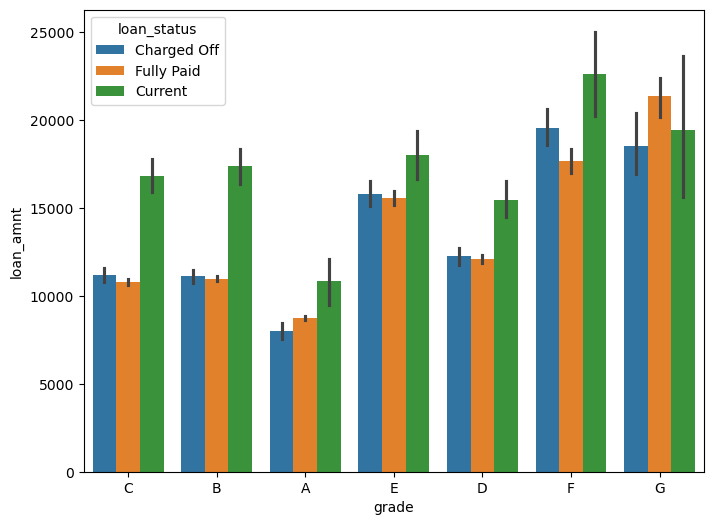

In [478]:
plt.figure(figsize=[8,6])
sns.barplot(x='grade', y = 'loan_amnt', hue = 'loan_status', data = finaldf)
plt.show()

##### In each grade it can be observed that the loan_amount value for charged off loans tend to be higher than the fully paid ones

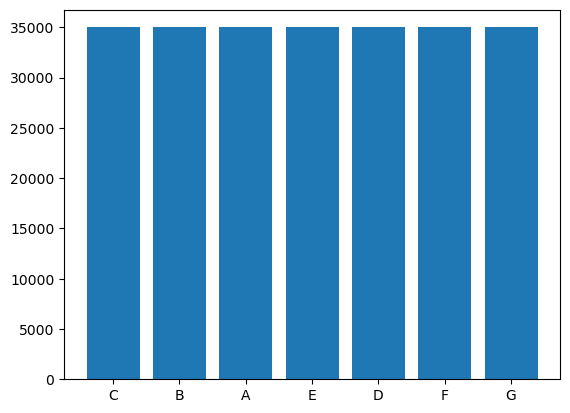

In [483]:
plt.bar(finaldf.grade,finaldf.loan_amnt)
plt.show()

In [485]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37119 entries, 0 to 37118
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       37119 non-null  int64  
 1   id                          37119 non-null  int64  
 2   member_id                   37119 non-null  int64  
 3   loan_amnt                   37119 non-null  int64  
 4   funded_amnt                 37119 non-null  int64  
 5   funded_amnt_inv             37119 non-null  float64
 6   term                        37119 non-null  object 
 7   int_rate                    37119 non-null  float64
 8   installment                 37119 non-null  float64
 9   grade                       37119 non-null  object 
 10  sub_grade                   37119 non-null  object 
 11  emp_title                   37119 non-null  object 
 12  emp_length                  37119 non-null  object 
 13  home_ownership              371

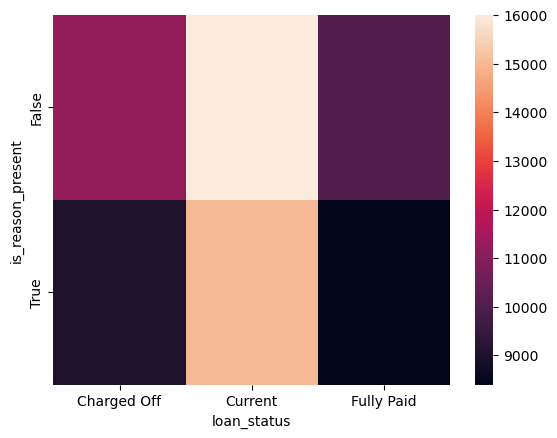

In [494]:
reason_present = finaldf.pivot_table(index = 'is_reason_present', columns = 'loan_status', values = 'loan_amnt', aggfunc = 'median')
sns.heatmap(reason_present)
plt.show()

In [516]:
statewise = finaldf.groupby(['addr_state', 'loan_status']).count()[['id']].sort_values(by = 'id', ascending = False)
statewise.columns = ['Count']

In [519]:
top10_addresses = statewise.loc[:,'Charged Off',:].index[:10]
top10_addresses

Index(['CA', 'FL', 'NY', 'TX', 'NJ', 'GA', 'IL', 'VA', 'PA', 'MD'], dtype='object', name='addr_state')

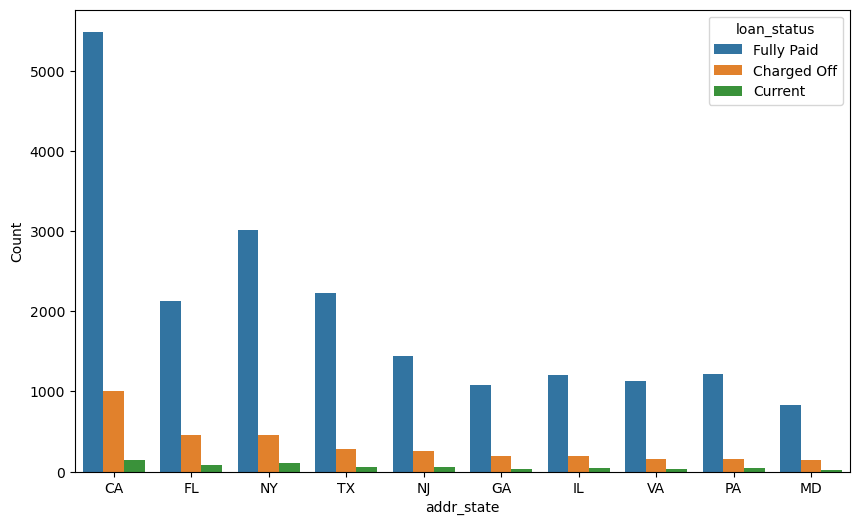

In [522]:
plt.figure(figsize = [10,6])
sns.barplot(x = 'addr_state', hue = 'loan_status', y = 'Count', data = statewise.loc[top10_addresses,:,:])
plt.show()

In [521]:
statewise.loc[top10_addresses,:,:]

Count
addr_state loan_status       
CA         Fully Paid    5490
           Charged Off   1002
           Current        140
FL         Fully Paid    2127
           Charged Off    455
           Current         81
NY         Fully Paid    3012
           Charged Off    453
           Current        108
TX         Fully Paid    2225
           Charged Off    280
           Current         63
NJ         Fully Paid    1439
           Charged Off    263
           Current         56
GA         Fully Paid    1076
           Charged Off    199
           Current         38
IL         Fully Paid    1205
           Charged Off    190
           Current         45
VA         Fully Paid    1124
           Charged Off    163
           Current         37
PA         Fully Paid    1222
           Charged Off    163
           Current         44
MD         Fully Paid     830
           Charged Off    143
           Current         24